<a href="https://colab.research.google.com/github/jung0228/ML/blob/main/Dacon_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline   
import matplotlib.pyplot as plt 
import seaborn as sns   

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [ ]:
def cat_plot(column):
    f, ax = plt.subplots(1, 3, figsize=(16, 6))
    sns.countplot(x = column,
                data = train,
                ax = ax[0],
                order = train[column].value_counts().index)
    ax[0].tick_params(labelsize=12)
    ax[0].set_title('Full train data')
    ax[0].set_ylabel('count')
    ax[0].tick_params(rotation=50)


    sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
    ax[1].tick_params(labelsize=12)
    ax[1].set_title('target = 1')
    ax[1].set_ylabel('count')
    ax[1].tick_params(rotation=50)

    sns.countplot(x = column,
                data = train_0,
                ax = ax[2],
                order = train_0[column].value_counts().index)
    ax[2].tick_params(labelsize=12)
    ax[2].set_title('target = 0')
    ax[2].set_ylabel('count')
    ax[2].tick_params(rotation=50)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [ ]:
Categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
Order = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink','Gate location', 
         'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
         'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
         'Cleanliness', 'Online boarding']
Continuous = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [ ]:
train_0 = train[train['target']==0]
train_1 = train[train['target']==1]

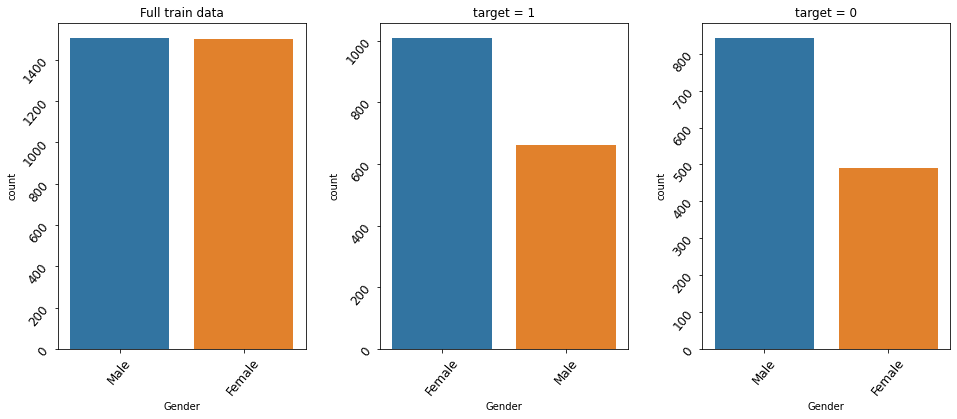

In [ ]:
# 여성이 점수를 잘 준다.
cat_plot("Gender")

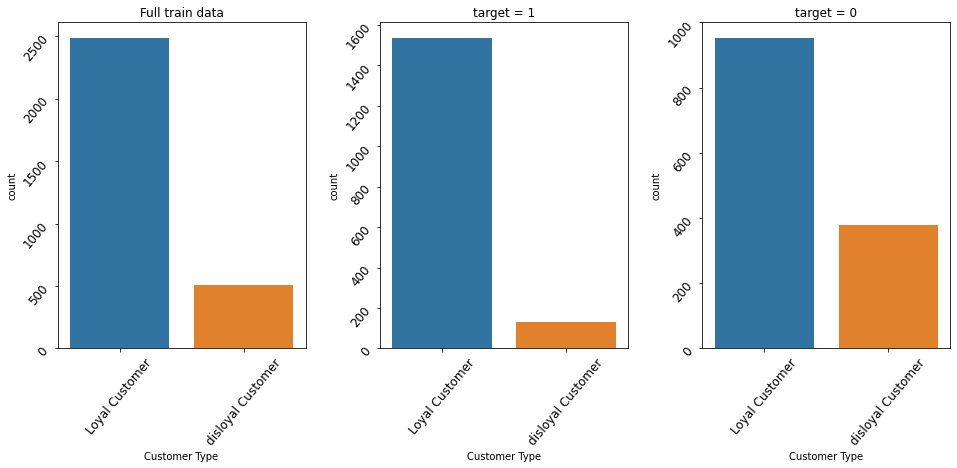

In [ ]:
# 이건 로얄이 많긴 하지만, 로얄 아닌 사람이 불만족할 확률이 높음
cat_plot('Customer Type')

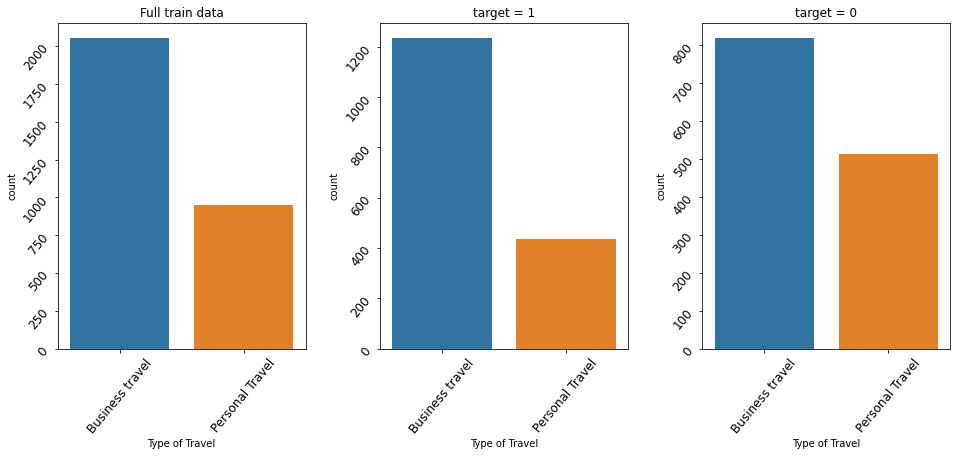

In [ ]:
# 비지니스는 반반, 개인은 불만족할 확률이 높음
cat_plot('Type of Travel')

오! 확실히 이건 차이가 난다. 비니지스가 훨씬 만족스럽긴 하구나!!!

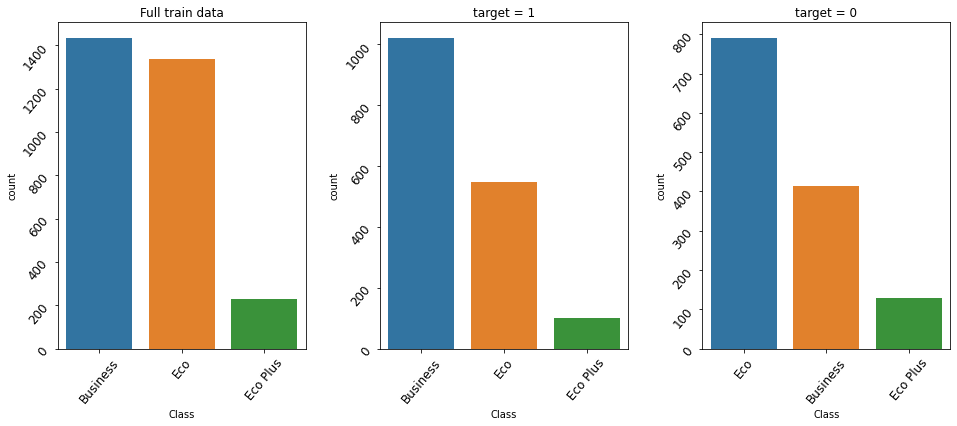

In [ ]:
# 비지니스 만족 확률 높음, 이코노미 불만족 확률 높음.
cat_plot('Class')

In [ ]:
# 이거 쓰면 그냥 원 핫 인코딩 되어서 나옴
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train.head()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,22,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0,1,0,0,1,1,0,0,1,0
1,2,37,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0,1,0,1,0,1,0,1,0,0
2,3,46,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1,0,1,1,0,1,0,1,0,0
3,4,24,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0,1,0,0,1,1,0,0,1,0
4,5,58,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1,1,0,1,0,1,0,1,0,0


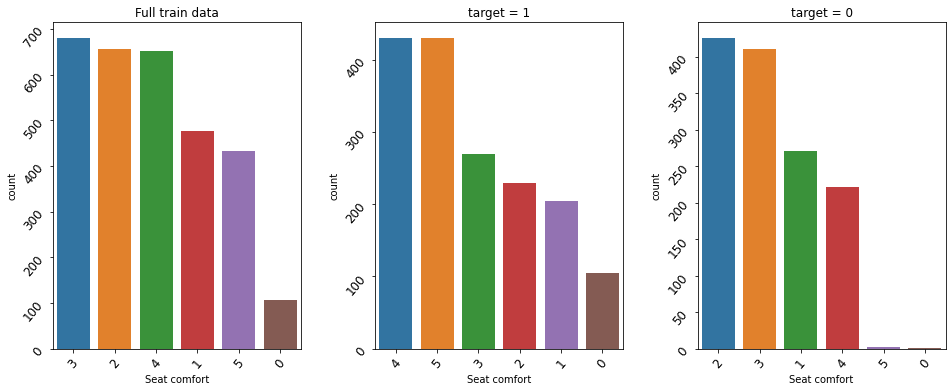

In [ ]:
# 편하면 만족하고, 불편하면 만족하지 못함
cat_plot("Seat comfort")

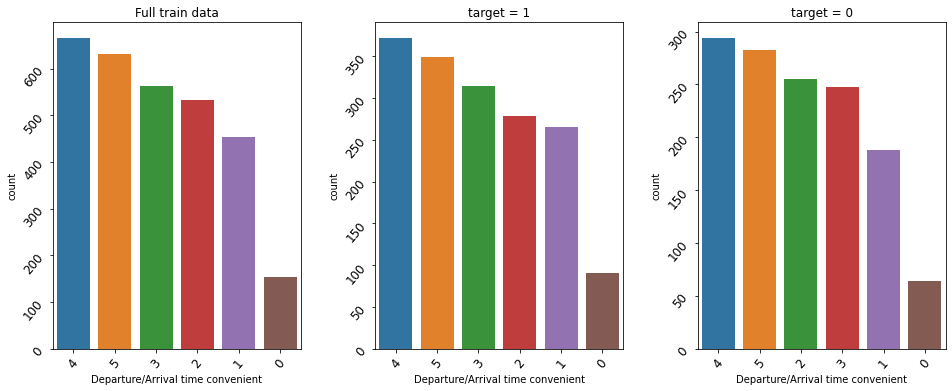

In [ ]:

cat_plot('Departure/Arrival time convenient')

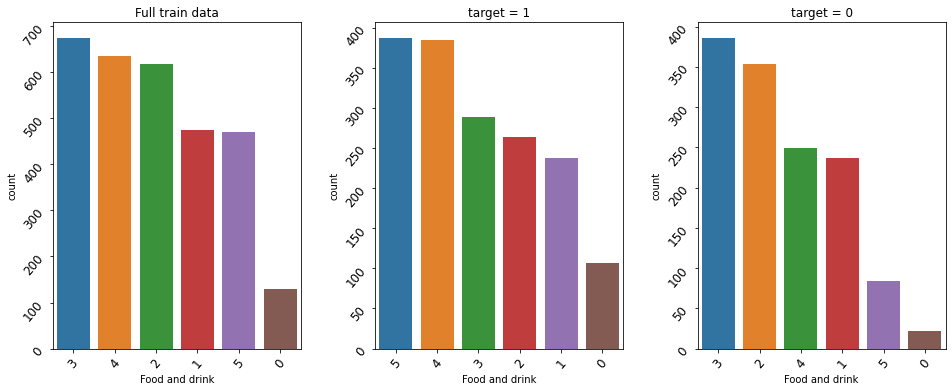

In [ ]:
cat_plot('Food and drink')

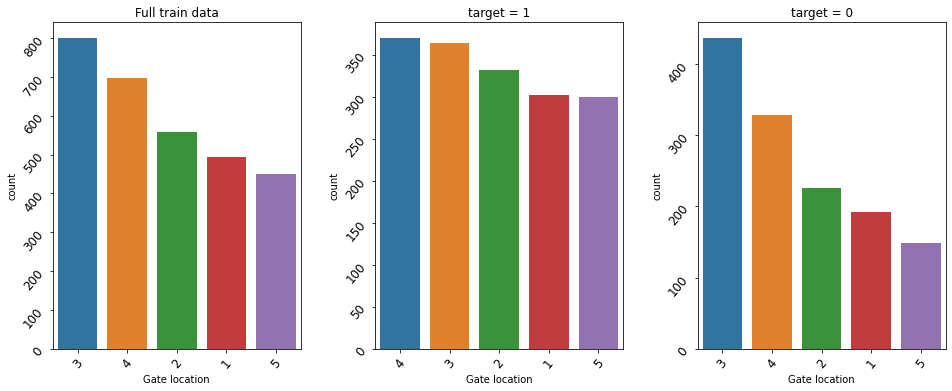

In [ ]:
cat_plot('Gate location')

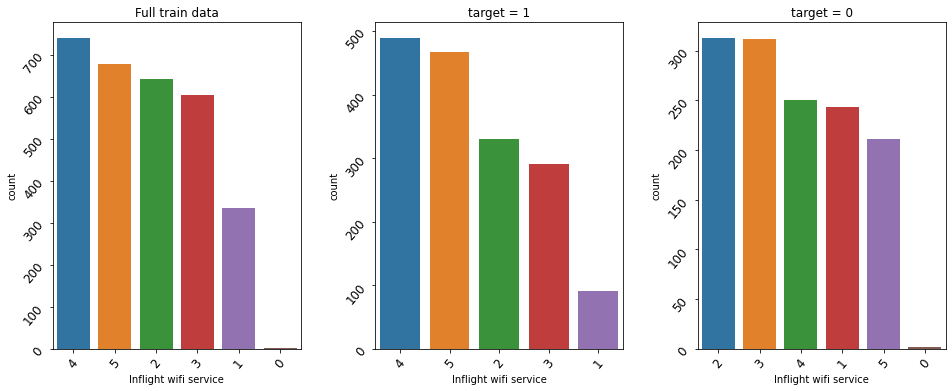

In [ ]:
cat_plot('Inflight wifi service')

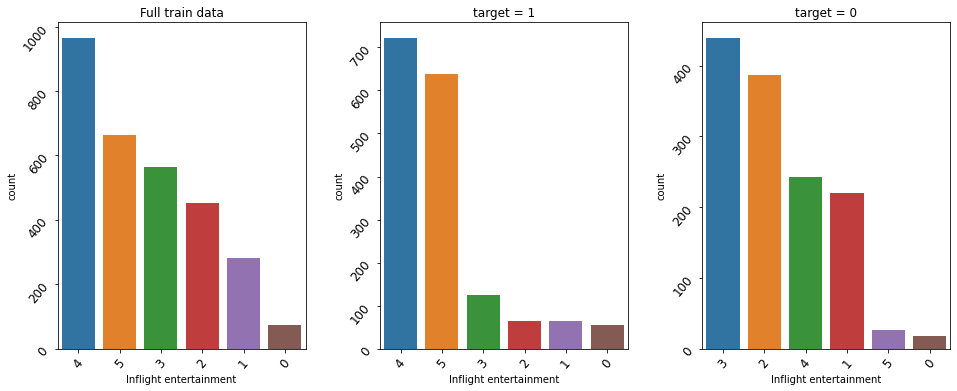

In [ ]:
cat_plot('Inflight entertainment')

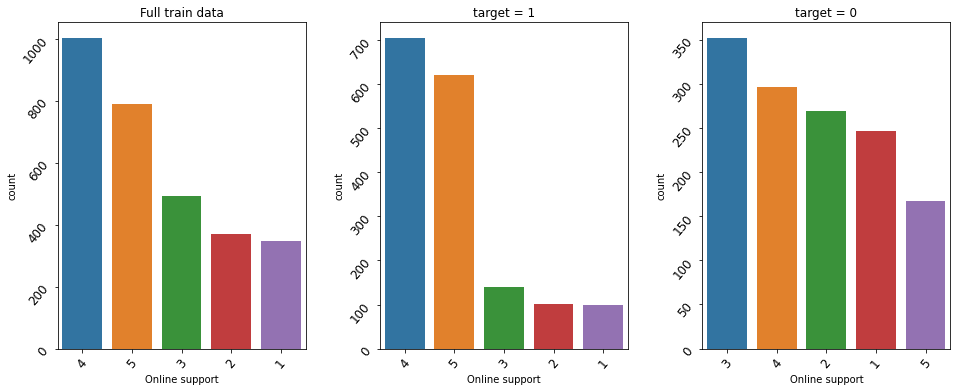

In [ ]:
cat_plot('Online support')

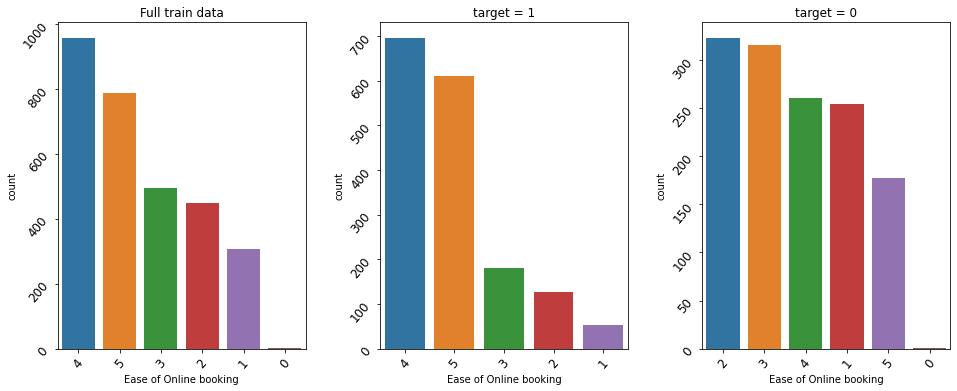

In [ ]:
cat_plot('Ease of Online booking')

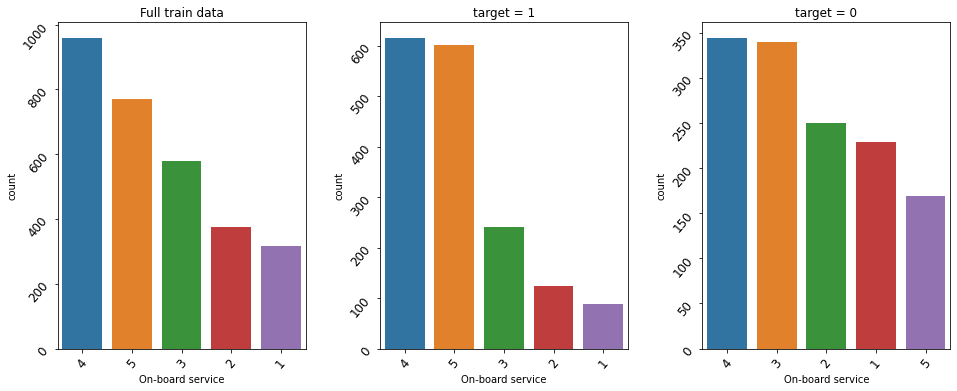

In [ ]:
cat_plot('On-board service')

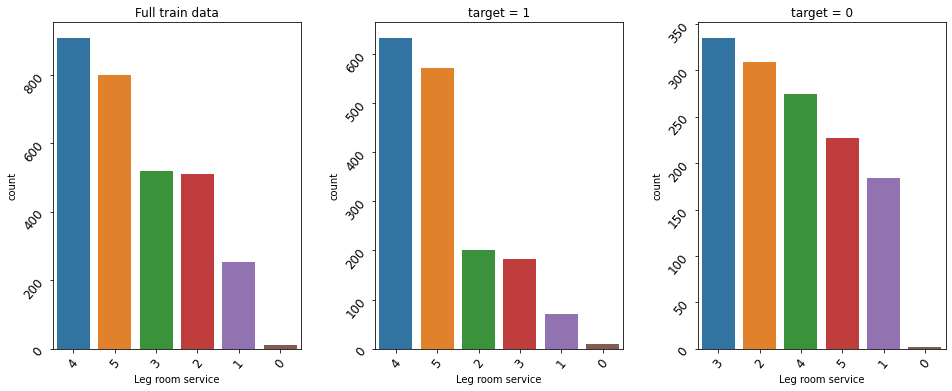

In [ ]:
cat_plot('Leg room service')

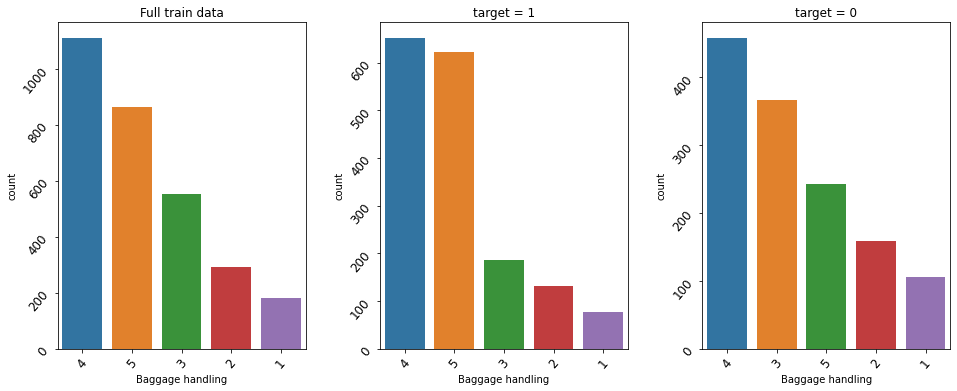

In [ ]:
cat_plot('Baggage handling')

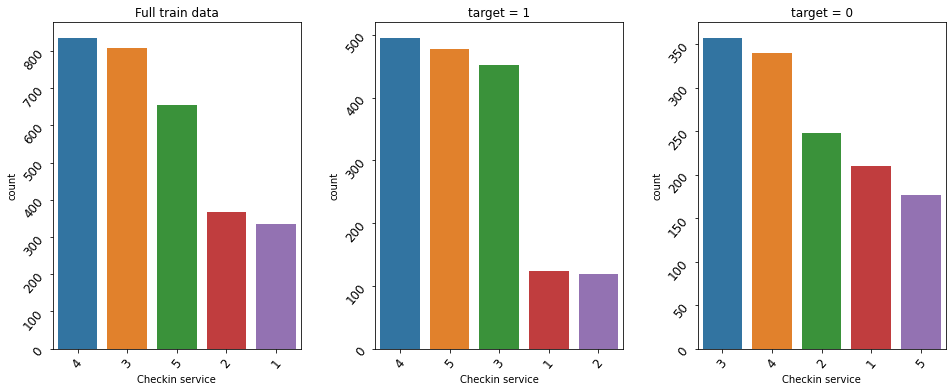

In [ ]:
cat_plot('Checkin service')

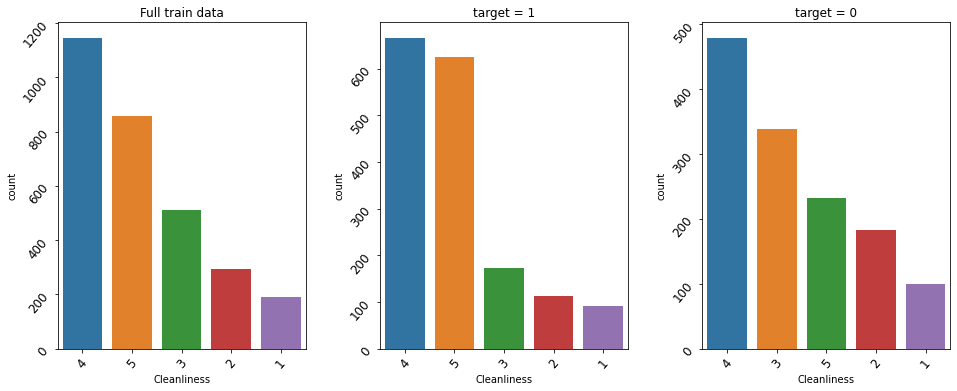

In [ ]:
cat_plot('Cleanliness')

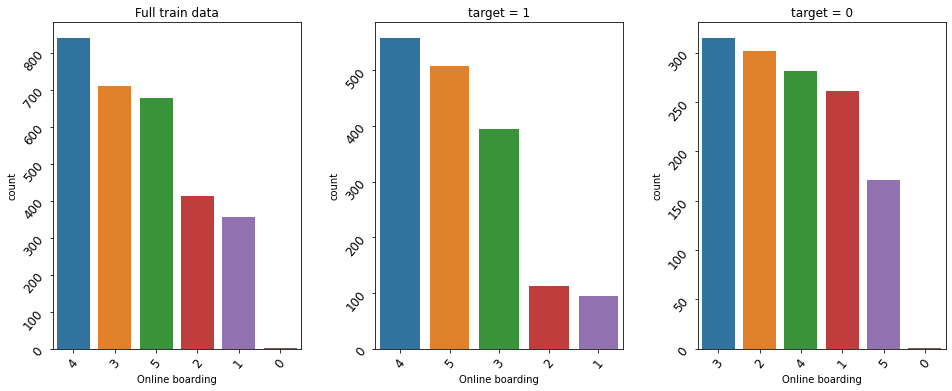

In [ ]:
cat_plot('Online boarding')

In [ ]:
# 그냥 하면 어떻게 될까?
# 복사해주고
# 학습 검증 테스트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train2 = train.copy()
test2 = test.copy()
train_label = train2['target']
train2.drop(['id', 'target'], axis = 1, inplace= True)
test2.drop(['id'], axis = 1, inplace= True)

# train-test분리
training_data, test_data , training_labels, test_labels = train_test_split(train2, train_label, train_size=0.8, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf.fit(training_data, training_labels)
print(rf.score(test_data, test_labels))


0.9433333333333334


In [ ]:
# 깔끔한 변수들
train['Seat comfort'][train['Seat comfort'] == 0] = 5
test['Seat comfort'][test['Seat comfort'] == 0] = 5

train['Inflight wifi service'][train['Inflight wifi service'] == 0] = 4
test['Inflight wifi service'][test['Inflight wifi service'] == 0] = 4

train['Ease of Online booking'][train['Ease of Online booking'] == 0] = 4
test['Ease of Online booking'][test['Ease of Online booking'] == 0] = 4

train['On-board service'][train['On-board service'] == 0] = 4
test['On-board service'][test['On-board service'] == 0] = 4


# 1,2 항목 병합 필요한 변수들
train['Inflight entertainment'][train['Inflight entertainment'] == 1] = 2
train['Inflight entertainment'][train['Inflight entertainment'] == 0] = 4

test['Inflight entertainment'][test['Inflight entertainment'] == 1] = 2
test['Inflight entertainment'][test['Inflight entertainment'] == 0] = 4

train['Online support'][train['Online support'] == 1] = 2
train['Online support'][train['Online support'] == 0] = 4

test['Online support'][test['Online support'] == 1] = 2
test['Online support'][test['Online support'] == 0] = 4

train['Checkin service'][train['Checkin service'] == 1] = 2
train['Checkin service'][train['Checkin service'] == 0] = 4

test['Checkin service'][test['Checkin service'] == 1] = 2
test['Checkin service'][test['Checkin service'] == 0] = 4

train['Cleanliness'][train['Cleanliness'] == 1] = 2
train['Cleanliness'][train['Cleanliness'] == 0] = 4

test['Cleanliness'][test['Cleanliness'] == 1] = 2
test['Cleanliness'][test['Cleanliness'] == 0] = 4

train['Online boarding'][train['Online boarding'] == 1] = 2
train['Online boarding'][train['Online boarding'] == 0] = 4

test['Online boarding'][test['Online boarding'] == 1] = 2
test['Online boarding'][test['Online boarding'] == 0] = 4


# 2,3 항목 변환 필요한 변수들
train['Leg room service'][train['Leg room service'] == 2] = 3
train['Leg room service'][train['Leg room service'] == 0] = 4

test['Leg room service'][test['Leg room service'] == 2] = 3
test['Leg room service'][test['Leg room service'] == 0] = 4

train['Baggage handling'][train['Baggage handling'] == 2] = 3
train['Baggage handling'][train['Baggage handling'] == 0] = 4

test['Baggage handling'][test['Baggage handling'] == 2] = 3
test['Baggage handling'][test['Baggage handling'] == 0] = 4


# 조금 특별한 변환 필요한 변수들
train['Food and drink'][train['Food and drink'] == 1] = -1
train['Food and drink'][train['Food and drink'] == 2] = 1
train['Food and drink'][train['Food and drink'] == 3] = 2
train['Food and drink'][train['Food and drink'] == -1] = 3
train['Food and drink'][train['Food and drink'] == 0] = 5

test['Food and drink'][test['Food and drink'] == 1] = -1
test['Food and drink'][test['Food and drink'] == 2] = 1
test['Food and drink'][test['Food and drink'] == 3] = 2
test['Food and drink'][test['Food and drink'] == -1] = 3
test['Food and drink'][test['Food and drink'] == 0] = 5

train['Gate location'][train['Gate location'] == 1] = 5
train['Gate location'][train['Gate location'] == 2] = 5
train['Gate location'][train['Gate location'] == 0] = 3

test['Gate location'][test['Gate location'] == 1] = 5
test['Gate location'][test['Gate location'] == 2] = 5
test['Gate location'][test['Gate location'] == 0] = 3


# 삭제할 변수
#train.drop(['Cleanliness'], axis = 1, inplace = True)
train.drop(['Departure/Arrival time convenient'], axis = 1, inplace = True)

test.drop(['Departure/Arrival time convenient'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
train2 = train.copy()
test2 = test.copy()
train_label = train2['target']
train2.drop(['id', 'target'], axis = 1, inplace= True)
test2.drop(['id'], axis = 1, inplace= True)

# train-test분리
training_data, test_data , training_labels, test_labels = train_test_split(train2, train_label, train_size=0.8, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf.fit(training_data, training_labels)
print(rf.score(test_data, test_labels))

0.9366666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

타겟 1 데이터의 평균 : 40.65047961630695
타겟 0 데이터의 평균 : 37.390390390390394
데이터의 표준오차 : 0.2758477133981643


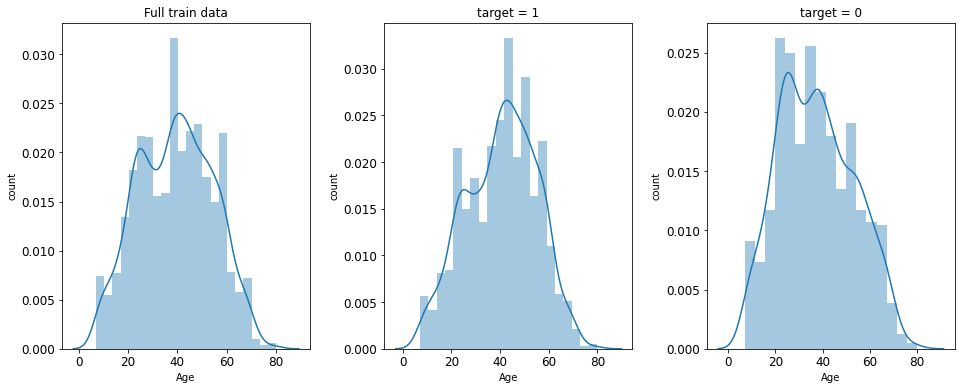

In [ ]:
import numpy as np
def num_plot(column):
  
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    sns.distplot(train[column],
                ax = axes[0])
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('Full train data')
    axes[0].set_ylabel('count')

    sns.distplot(train_1[column],
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('target = 1')
    axes[1].set_ylabel('count')

    sns.distplot(train_0[column],
                ax = axes[2])
    axes[2].tick_params(labelsize=12)
    axes[2].set_title('target = 0')
    axes[2].set_ylabel('count')

    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    print('타겟 1 데이터의 평균 :', (train_1[column]).mean())
    print('타겟 0 데이터의 평균 :', (train_0[column]).mean())
    print('데이터의 표준오차 :', train[column].std() / np.sqrt(3000))

num_plot("Age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

타겟 1 데이터의 평균 : 1935.2583932853718
타겟 0 데이터의 평균 : 2042.9632132132133
데이터의 표준오차 : 18.770618492960658


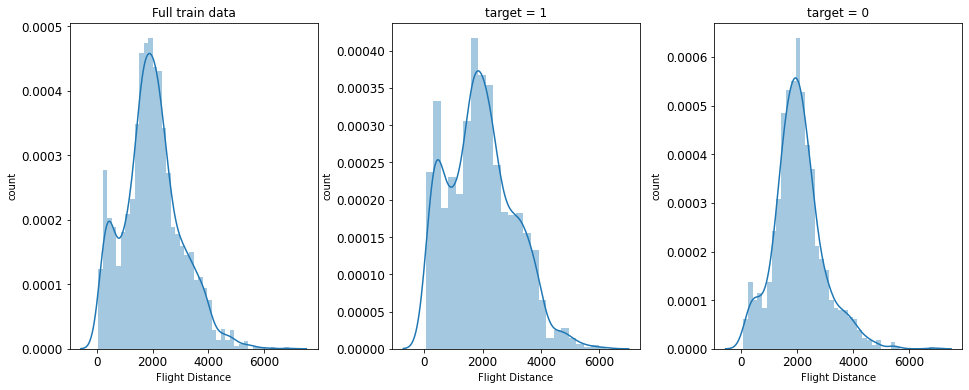

In [ ]:
num_plot("Flight Distance")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

타겟 1 데이터의 평균 : 11.405875299760192
타겟 0 데이터의 평균 : 20.92942942942943
데이터의 표준오차 : 0.8231033660699084


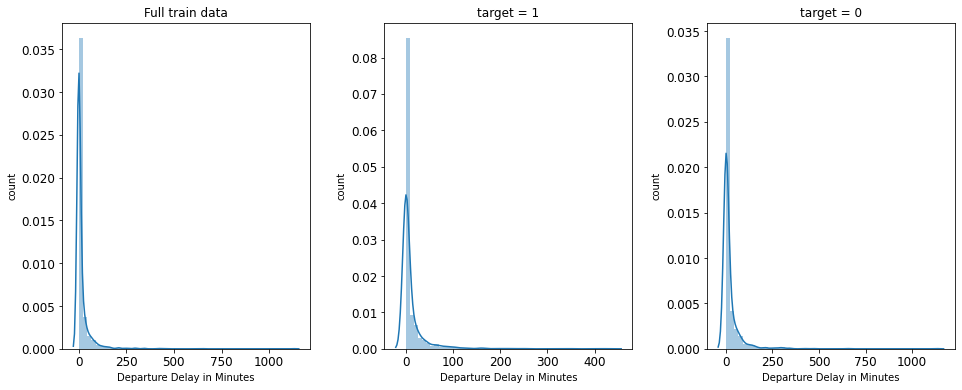

In [ ]:
num_plot("Departure Delay in Minutes")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

타겟 1 데이터의 평균 : 11.384892086330936
타겟 0 데이터의 평균 : 21.603603603603602
데이터의 표준오차 : 0.8252975959121616


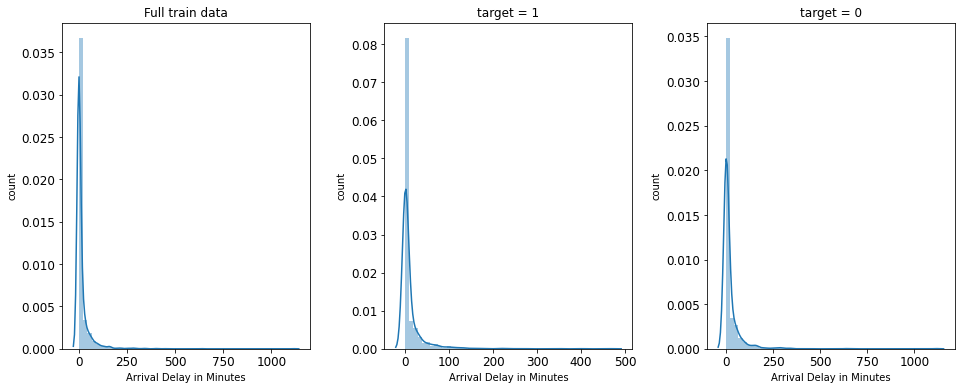

In [ ]:
num_plot("Arrival Delay in Minutes")

In [ ]:
print('두 변수간 상관계수:', train['Arrival Delay in Minutes'].corr(train["Departure Delay in Minutes"]))
print('출발 지연시간이 0인 값:', sum(train['Departure Delay in Minutes'] == 0))
print('도착 지연시간이 0인 값:', sum(train['Arrival Delay in Minutes'] == 0))

두 변수간 상관계수: 0.9768732919464286
출발 지연시간이 0인 값: 1705
도착 지연시간이 0인 값: 1661


In [ ]:
train['Flight Distance'] = np.log1p(train['Flight Distance'])
train['Arrival Delay in Minutes'] = np.log1p(train['Arrival Delay in Minutes'])

test['Flight Distance'] = np.log1p(test['Flight Distance'])
test['Arrival Delay in Minutes'] = np.log1p(test['Arrival Delay in Minutes'])


train.drop(['Departure Delay in Minutes'], axis = 1, inplace = True)
test.drop(['Departure Delay in Minutes'], axis = 1, inplace = True)

In [ ]:
train2 = train.copy()
test2 = test.copy()
train_label = train2['target']
train2.drop(['id', 'target'], axis = 1, inplace= True)
test2.drop(['id'], axis = 1, inplace= True)

# train-test분리
training_data, test_data , training_labels, test_labels = train_test_split(train2, train_label, 
                                                                           train_size=0.8, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf.fit(training_data, training_labels)
print(rf.score(test_data, test_labels))

0.94
